# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [2]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
import os.path
pot_do_podatkov = os.path.join("../../", "02-zajem-podatkov", "predavanja", "obdelani-podatki","filmi.csv")

filmi = pd.read_csv(pot_do_podatkov)

Poglejmo si podatke.

In [3]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [4]:
filmi.sort_values(["ocena", "leto"], ascending=False)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
2734,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2293163,28341469.0,R,Two imprisoned men bond over a number of years...
4058,252487,Hababam Sinifi,87,1975,9.3,NaN,36468,NaN,NaN,"Lazy, uneducated students share a very close b..."
908,68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...
9355,5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...
9815,7738784,Peranbu,147,2018,9.0,NaN,11866,NaN,NaN,"A single father tries to raise his daughter, w..."
...,...,...,...,...,...,...,...,...,...,...
9505,5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...
9513,6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...
8983,4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...
9825,7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv..."


Poberite stolpec ocen.

In [9]:
ocene = filmi["ocena"]
ocene

0       6.3
1       7.7
2       7.3
3       8.1
4       8.3
       ... 
9995    5.8
9996    6.3
9997    6.6
9998    7.3
9999    6.6
Name: ocena, Length: 10000, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [16]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [23]:
zaokrozene = round(ocene)
zaokrozene

0       6.0
1       8.0
2       7.0
3       8.0
4       8.0
       ... 
9995    6.0
9996    4.0
9997    7.0
9998    6.0
9999    8.0
Name: ocena, Length: 10000, dtype: float64

Dodajte zaokrožene vrednosti v podatke.

In [24]:
filmi["zaokrozene ocene"] = zaokrozene
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozene ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [29]:
#filmi = filmi.drop(columns="zaokrozene ocene")
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [31]:
filmi_light = filmi[["naslov", "leto", "glasovi"]]
filmi_light["zaokrozena ocena"] = zaokrozene
filmi_light

<ipython-input-31-3c9d0c0b722c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmi_light["zaokrozena ocena"] = zaokrozene


,naslov,leto,glasovi,zaokrozena ocena
0,The Birth of a Nation,1915,20737,6.0
1,Intolerance: Love's Struggle Throughout the Ages,1916,13031,8.0
2,Broken Blossoms or The Yellow Man and the Girl,1919,8700,7.0
3,Das Cabinet des Dr. Caligari,1920,50866,8.0
4,The Kid,1921,100210,8.0
...,...,...,...,...
9995,Between Two Ferns: The Movie,2019,7319,6.0
9996,Secret Obsession,2019,13308,4.0
9997,Black Mirror: Bandersnatch,2018,96998,7.0
9998,Falling Inn Love,2019,7389,6.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [43]:
prej_mask = filmi["leto"] < 1930
potem_mask = filmi["leto"] > 2017
filmi[prej_mask | potem_mask].head(3)
filmi[prej_mask | potem_mask].tail(4)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...
9999,10324144,Article 15,130,2019,8.3,NaN,11001,NaN,NaN,"In the rural heartlands of India, an upright p..."


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [46]:
def je_kratek_naslov(naslov, max_besed=2):
    return len(naslov.split()) <= max_besed
    
dobra_ocena = filmi["ocena"] > 8
kratki_naslovi = filmi["naslov"].apply(je_kratek_naslov)
kratki_naslovi

0       False
1       False
2       False
3       False
4        True
        ...  
9995    False
9996     True
9997    False
9998    False
9999     True
Name: naslov, Length: 10000, dtype: bool

### Histogrami

Združite filme po ocenah in jih preštejte.

In [49]:
filmi["zaokrozena ocena"] = zaokrozene
po_ocenah = filmi.groupby("zaokrozena ocena").size()
po_ocenah

zaokrozena ocena
1.0        4
2.0       42
3.0       52
4.0      230
5.0      853
6.0     3193
7.0     3521
8.0     2034
9.0       70
10.0       1
dtype: int64

Naredite stolpični diagram teh podatkov.

<IPython.core.display.Javascript object>


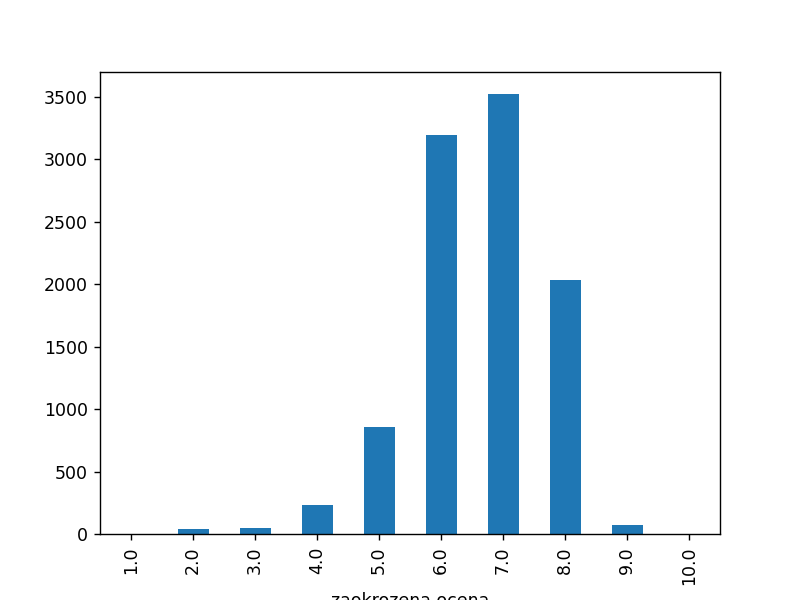

<AxesSubplot:xlabel='zaokrozena ocena'>

In [65]:
po_ocenah.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

In [64]:
filmi["ocena"].hist()

<AxesSubplot:xlabel='leto'>

### Izris povprečne dolžine filma glede na leto

<AxesSubplot:xlabel='leto'>

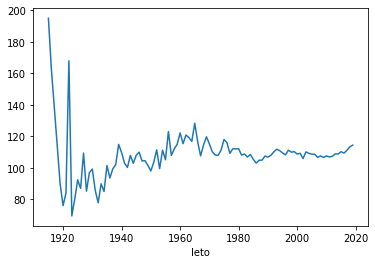

In [68]:
filmi_po_letu = filmi.groupby("leto")
povprecja_po_letu = filmi_po_letu.mean()
povprecna_dolzina = povprecja_po_letu["dolzina"]
povprecna_dolzina.plot()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

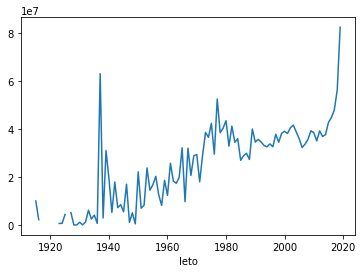

In [67]:
filmi_po_letu.mean()["zasluzek"].plot()

In [73]:
%%time
a = [j**2 for j in range(1210000212)]

MemoryError: 